# Semantic Segmentation

![](doge_segmentation.png)

## Unet architecture

![](unet.png)

In [ ]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gdown

In [ ]:
gdown.download(url="https://drive.google.com/file/d/1kiR9pPP3gIqoyT9bWUnA0rgZuRTiUv7q/view?usp=share_link", output="./unet_dict.pt", quiet=False, fuzzy=True)

In [ ]:
class Encoder_Block(torch.nn.Module):
  def __init__(self,inp_channels,out_channels):
    super().__init__()
    self.model = torch.nn.Sequential(
        #implement encoder block
    )
    self.pooling = # implement pooling
  def forward(self,x):
    #compute intermediate output (before pooling)
    return # return intermediate and after pooling outputs

class Decoder_Block(torch.nn.Module):
  def __init__(self,inp_channels,out_channels):
    super().__init__()
    self.upsample = # implement upsampling using transposed convolution
    self.model = torch.nn.Sequential(
        #implement decoder block
    )
  def forward(self,x,enc_x):
    x = #make upsampling
    x = #concatenate upscaled input with encoder block output (enc_x)
    return self.model(x)

# Let's check our implementation

In [ ]:
enc = Encoder_Block(64,128)
dec = Decoder_Block(256,128)
inp = torch.randn(1,64,64,64)
x,enc_x = enc(inp)

assert x.shape == (1,128,32,32), "correct encoder implementation"

inp = torch.randn(1,256,32,32)
x = dec(inp,enc_x)

assert x.shape == (1,128,64,64), "correct decoder implementation"

In [ ]:
class Unet(torch.nn.Module):
  def __init__(self,inc,outc,hidden_size=64):
    super().__init__()
    self.Encoder = torch.nn.ModuleList([
        #implement full encoder by adding encoder blocks
    ])
    self.bottleneck = torch.nn.Sequential(
        #implement bottleneck - sequatial application of convolutional layers with kernel size 1
    )
    self.Decoder = torch.nn.ModuleList([
        #implement full decoder by adding decoder blocks
    ])
    self.last_layer = torch.nn.Conv2d(hidden_size,outc,kernel_size=3,padding="same")
  def forward(self,x):
    enc_xs = []
    for module in self.Encoder:
      # apply encoder modules sequentially, do not forget to store intermediate output
    
    enc_xs = enc_xs[::-1]
    x = self.bottleneck(x)

    for i,module in enumerate(self.Decoder):
      # apply decoder modules sequentially using intermediate encoder outputs
    return self.last_layer(x)

## Check that your implementation works correctly

In [ ]:
unet = Unet(3,11)

assert unet(torch.randn(1,3,128,128)).shape == (1,11,128,128), "check your implementation"

## Let's start working with data

In [ ]:
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5,std=0.5)
])
def class_split(data,n=3):
  data = np.array(data)
  res = []
  for i in range(1,1+n):
    mask = np.zeros_like(data)
    mask[data==i] = 1.
    res.append(mask[None])
  return torch.from_numpy(np.concatenate(res,axis=0)).to(torch.float)

target_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    class_split
])
dataset = torchvision.datasets.OxfordIIITPet("./data",split="trainval",target_types="segmentation",download=True,transform=transform,target_transform=target_transform)

100%|██████████| 791918971/791918971 [00:37<00:00, 21168795.70it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 10020703.36it/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet = Unet(3,3).to(device)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=32,shuffle=True)
optimizer = torch.optim.Adam(unet.parameters(),lr=0.001)

In [ ]:
def train(model,dataloader,optimizer,loss_func=torch.nn.CrossEntropyLoss(),epochs=5):
  for i in range(epochs):
    for x,y in dataloader:
      #implement standard training stuff

In [ ]:
train(unet,dataloader,optimizer)

In [ ]:
iou = []
for x,y in tqdm(dataloader):
  #implement evaluation of iou by directly computing intersection and union between class masks generated by model and ground truth

In [ ]:
round(np.mean(iou)*100,1)

In [ ]:
!wget -nv "https://fikiwiki.com/uploads/posts/2022-02/1644990866_45-fikiwiki-com-p-prikolnie-kartinki-pro-zhivotnikh-47.png"

2023-04-03 23:15:50 URL:https://fikiwiki.com/uploads/posts/2022-02/1644990866_45-fikiwiki-com-p-prikolnie-kartinki-pro-zhivotnikh-47.png [1205459/1205459] -> "1644990866_45-fikiwiki-com-p-prikolnie-kartinki-pro-zhivotnikh-47.png" [1]


In [ ]:
from PIL import Image
img = Image.open("/content/1644990866_45-fikiwiki-com-p-prikolnie-kartinki-pro-zhivotnikh-47.png")

In [ ]:
img = transform(img)[:3][None].to(device)
mask = unet(img)[0]

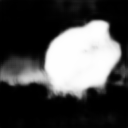

In [ ]:
transforms.ToPILImage()(torch.nn.Softmax(dim=0)(mask)[0:1].detach().cpu())

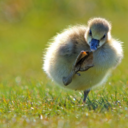

In [ ]:
transforms.ToPILImage()(img[0].detach().cpu()/2+0.5)